In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [5]:
dfm_ready = pd.read_csv('dfm.csv', index_col=0)
dfm_ready.head()

,DEP_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,AIRLINE_American Airlines Inc.,AIRLINE_Delta Air Lines Inc.,AIRLINE_Frontier Airlines Inc.,AIRLINE_JetBlue Airways,AIRLINE_Republic Airline,AIRLINE_SkyWest Airlines Inc.,AIRLINE_Southwest Airlines Co.,AIRLINE_Spirit Air Lines,AIRLINE_United Air Lines Inc.,"DEST_CITY_Baltimore, MD","DEST_CITY_Boston, MA","DEST_CITY_Charlotte, NC","DEST_CITY_Chicago, IL","DEST_CITY_Dallas/Fort Worth, TX","DEST_CITY_Denver, CO","DEST_CITY_Detroit, MI","DEST_CITY_Fort Lauderdale, FL","DEST_CITY_Houston, TX","DEST_CITY_Las Vegas, NV","DEST_CITY_Los Angeles, CA","DEST_CITY_Miami, FL","DEST_CITY_Minneapolis, MN","DEST_CITY_Nashville, TN","DEST_CITY_New York, NY","DEST_CITY_Newark, NJ","DEST_CITY_Orlando, FL","DEST_CITY_Philadelphia, PA","DEST_CITY_Phoenix, AZ","DEST_CITY_Salt Lake City, UT","DEST_CITY_San Diego, CA","DEST_CITY_San Francisco, CA","DEST_CITY_Seattle, WA","DEST_CITY_Washington, DC",CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,YEAR_2021,YEAR_2022,YEAR_2023
0,-6.0,235.0,236.0,189.0,1399.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
1,6.0,118.0,112.0,87.0,680.0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,-1.0,260.0,285.0,249.0,1589.0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,-2.0,181.0,182.0,153.0,985.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,-9.0,109.0,89.0,58.0,399.0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [6]:
#one hot encoding for categorical columns
categorical_columns = dfm_ready.select_dtypes(include=['object']).columns

dfm_ready_encoded = pd.get_dummies(dfm_ready,columns=categorical_columns, dtype=int)

In [7]:
dfm_ready_encoded.head()

,DEP_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,AIRLINE_American Airlines Inc.,AIRLINE_Delta Air Lines Inc.,AIRLINE_Frontier Airlines Inc.,AIRLINE_JetBlue Airways,AIRLINE_Republic Airline,AIRLINE_SkyWest Airlines Inc.,AIRLINE_Southwest Airlines Co.,AIRLINE_Spirit Air Lines,AIRLINE_United Air Lines Inc.,"DEST_CITY_Baltimore, MD","DEST_CITY_Boston, MA","DEST_CITY_Charlotte, NC","DEST_CITY_Chicago, IL","DEST_CITY_Dallas/Fort Worth, TX","DEST_CITY_Denver, CO","DEST_CITY_Detroit, MI","DEST_CITY_Fort Lauderdale, FL","DEST_CITY_Houston, TX","DEST_CITY_Las Vegas, NV","DEST_CITY_Los Angeles, CA","DEST_CITY_Miami, FL","DEST_CITY_Minneapolis, MN","DEST_CITY_Nashville, TN","DEST_CITY_New York, NY","DEST_CITY_Newark, NJ","DEST_CITY_Orlando, FL","DEST_CITY_Philadelphia, PA","DEST_CITY_Phoenix, AZ","DEST_CITY_Salt Lake City, UT","DEST_CITY_San Diego, CA","DEST_CITY_San Francisco, CA","DEST_CITY_Seattle, WA","DEST_CITY_Washington, DC",CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6,YEAR_2021,YEAR_2022,YEAR_2023
0,-6.0,235.0,236.0,189.0,1399.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
1,6.0,118.0,112.0,87.0,680.0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,-1.0,260.0,285.0,249.0,1589.0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,-2.0,181.0,182.0,153.0,985.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,-9.0,109.0,89.0,58.0,399.0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [8]:
dfm_ready_encoded_sampled = dfm_ready_encoded.sample(frac=0.50, random_state=42)


In [10]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [11]:
#adaboost and GBT Classifier
adaboost_clf = AdaBoostClassifier(random_state=42)
                                 
gbt_clf = GradientBoostingClassifier(random_state=42)

In [12]:
#splitting
y = dfm_ready_encoded_sampled['FLIGHT_STATUS']
X = dfm_ready_encoded_sampled.drop(['FLIGHT_STATUS'], axis = 1)

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
#fitting
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [17]:
#fitting
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
#predict
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

In [19]:
#predict
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, f1_score

In [22]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
print('----------------------------')
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
print('----------------------------')
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
----------------------------
Model: AdaBoost
Accuracy: 0.856385157136431
F1-Score: 0.7547887889035364

Model: Gradient Boosted Trees
Accuracy: 0.904805064888853
F1-Score: 0.8474802344968536

Testing Metrics
----------------------------
Model: AdaBoost
Accuracy: 0.8555769402918271
F1-Score: 0.7548808094926996

Model: Gradient Boosted Trees
Accuracy: 0.9033166233998747
F1-Score: 0.8457534168320933


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
#adaboost confusion matrix
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[282935,   9208],
       [ 55326,  99371]], dtype=int64)

In [26]:
#GBT confusion matrix
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[285197,   6946],
       [ 36256, 118441]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report

In [29]:
#Adaboost Classification report
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90    292143
           1       0.92      0.64      0.75    154697

    accuracy                           0.86    446840
   macro avg       0.88      0.81      0.83    446840
weighted avg       0.86      0.86      0.85    446840



In [30]:
#GBT Classification report
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    292143
           1       0.94      0.77      0.85    154697

    accuracy                           0.90    446840
   macro avg       0.92      0.87      0.89    446840
weighted avg       0.91      0.90      0.90    446840



In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.855773958353387


In [34]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.9046135635707572


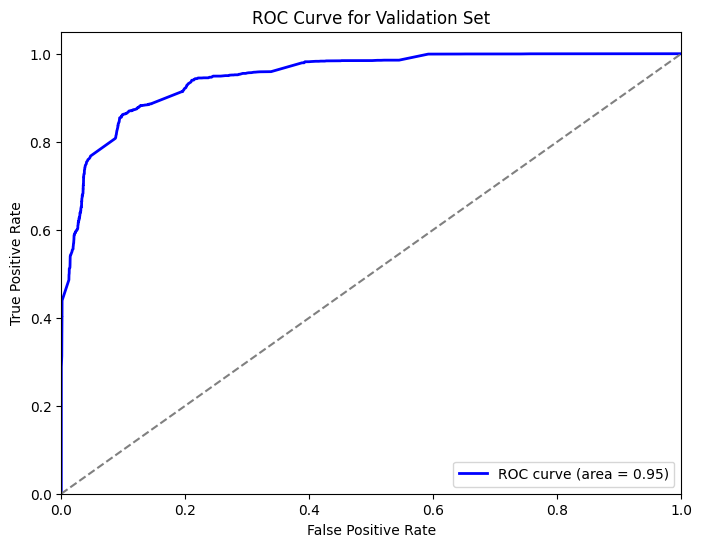

In [35]:
#ROC for Adaboost
from sklearn.metrics import classification_report, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, adaboost_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Set')
plt.legend(loc="lower right")
plt.show()

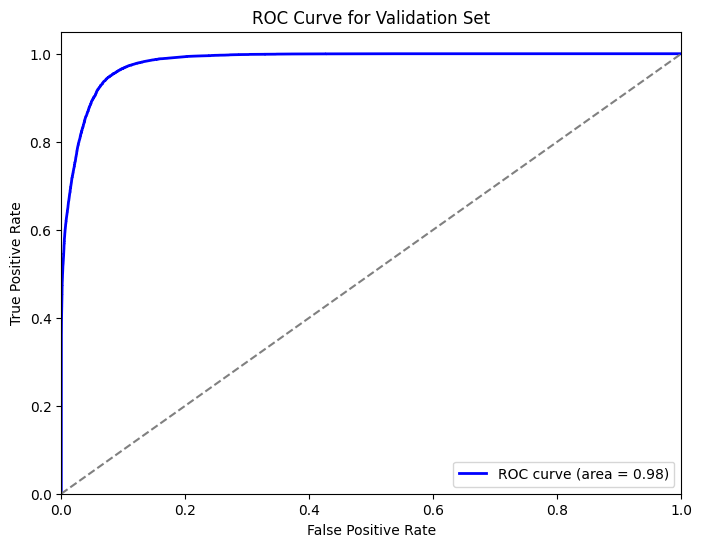

In [36]:
#roc for GBT
fpr, tpr, thresholds = roc_curve(y_test, gbt_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Set')
plt.legend(loc="lower right")
plt.show()